# Session 2
## Generation models and graph layout algorithms

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

opt = { 'node_size': 20,
        'width': 2,
        'font_size': 5,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'gray',
        'node_color': 'orange'}

In [35]:
examples = [ (nx.generators.classic.complete_graph(6), 'nxcomplete'),                            # everything connected (x) x = number of vertices
             (nx.generators.lattice.triangular_lattice_graph(5, 4), 'nxtri'),                    # (x,y) x*y = number of triangles
             (nx.generators.lattice.grid_2d_graph(5, 4), 'nxsquare'),                            # (x,y) (x-1)*(y-1) = number of quadrilaterals
             (nx.generators.lattice.hexagonal_lattice_graph(3, 3), 'nxhex'),                     # (x,y) x*y = number of hexagons
             (nx.generators.random_graphs.connected_watts_strogatz_graph(20, 4, 0.15), 'nxws'),  #
             (nx.generators.random_graphs.random_regular_graph(3, 16), 'nxregular'),
             (nx.generators.random_graphs.gnm_random_graph(20, 35), 'nxerdos'),
             (nx.generators.classic.circular_ladder_graph(12), 'nxcirc'),
             (nx.generators.classic.ladder_graph(12), 'nxladder'),
             (nx.generators.random_graphs.barabasi_albert_graph(15, 3), 'nxba'),
             (nx.generators.random_graphs.powerlaw_cluster_graph(20, 4, 0.15), 'nxtree'),
             (nx.generators.classic.star_graph(20), 'nxstar'),
             (nx.generators.classic.barbell_graph(6, 2), 'nxbarbell'),
             (nx.generators.classic.wheel_graph(12), 'nxwheel'),
             (nx.generators.classic.path_graph(12), 'nxpath') ]

layouts = [ (nx.spectral_layout, 'spectral'),
            (nx.kamada_kawai_layout, 'KK'),
            (nx.spring_layout, 'spring'),
            (nx.circular_layout, 'circular') ]

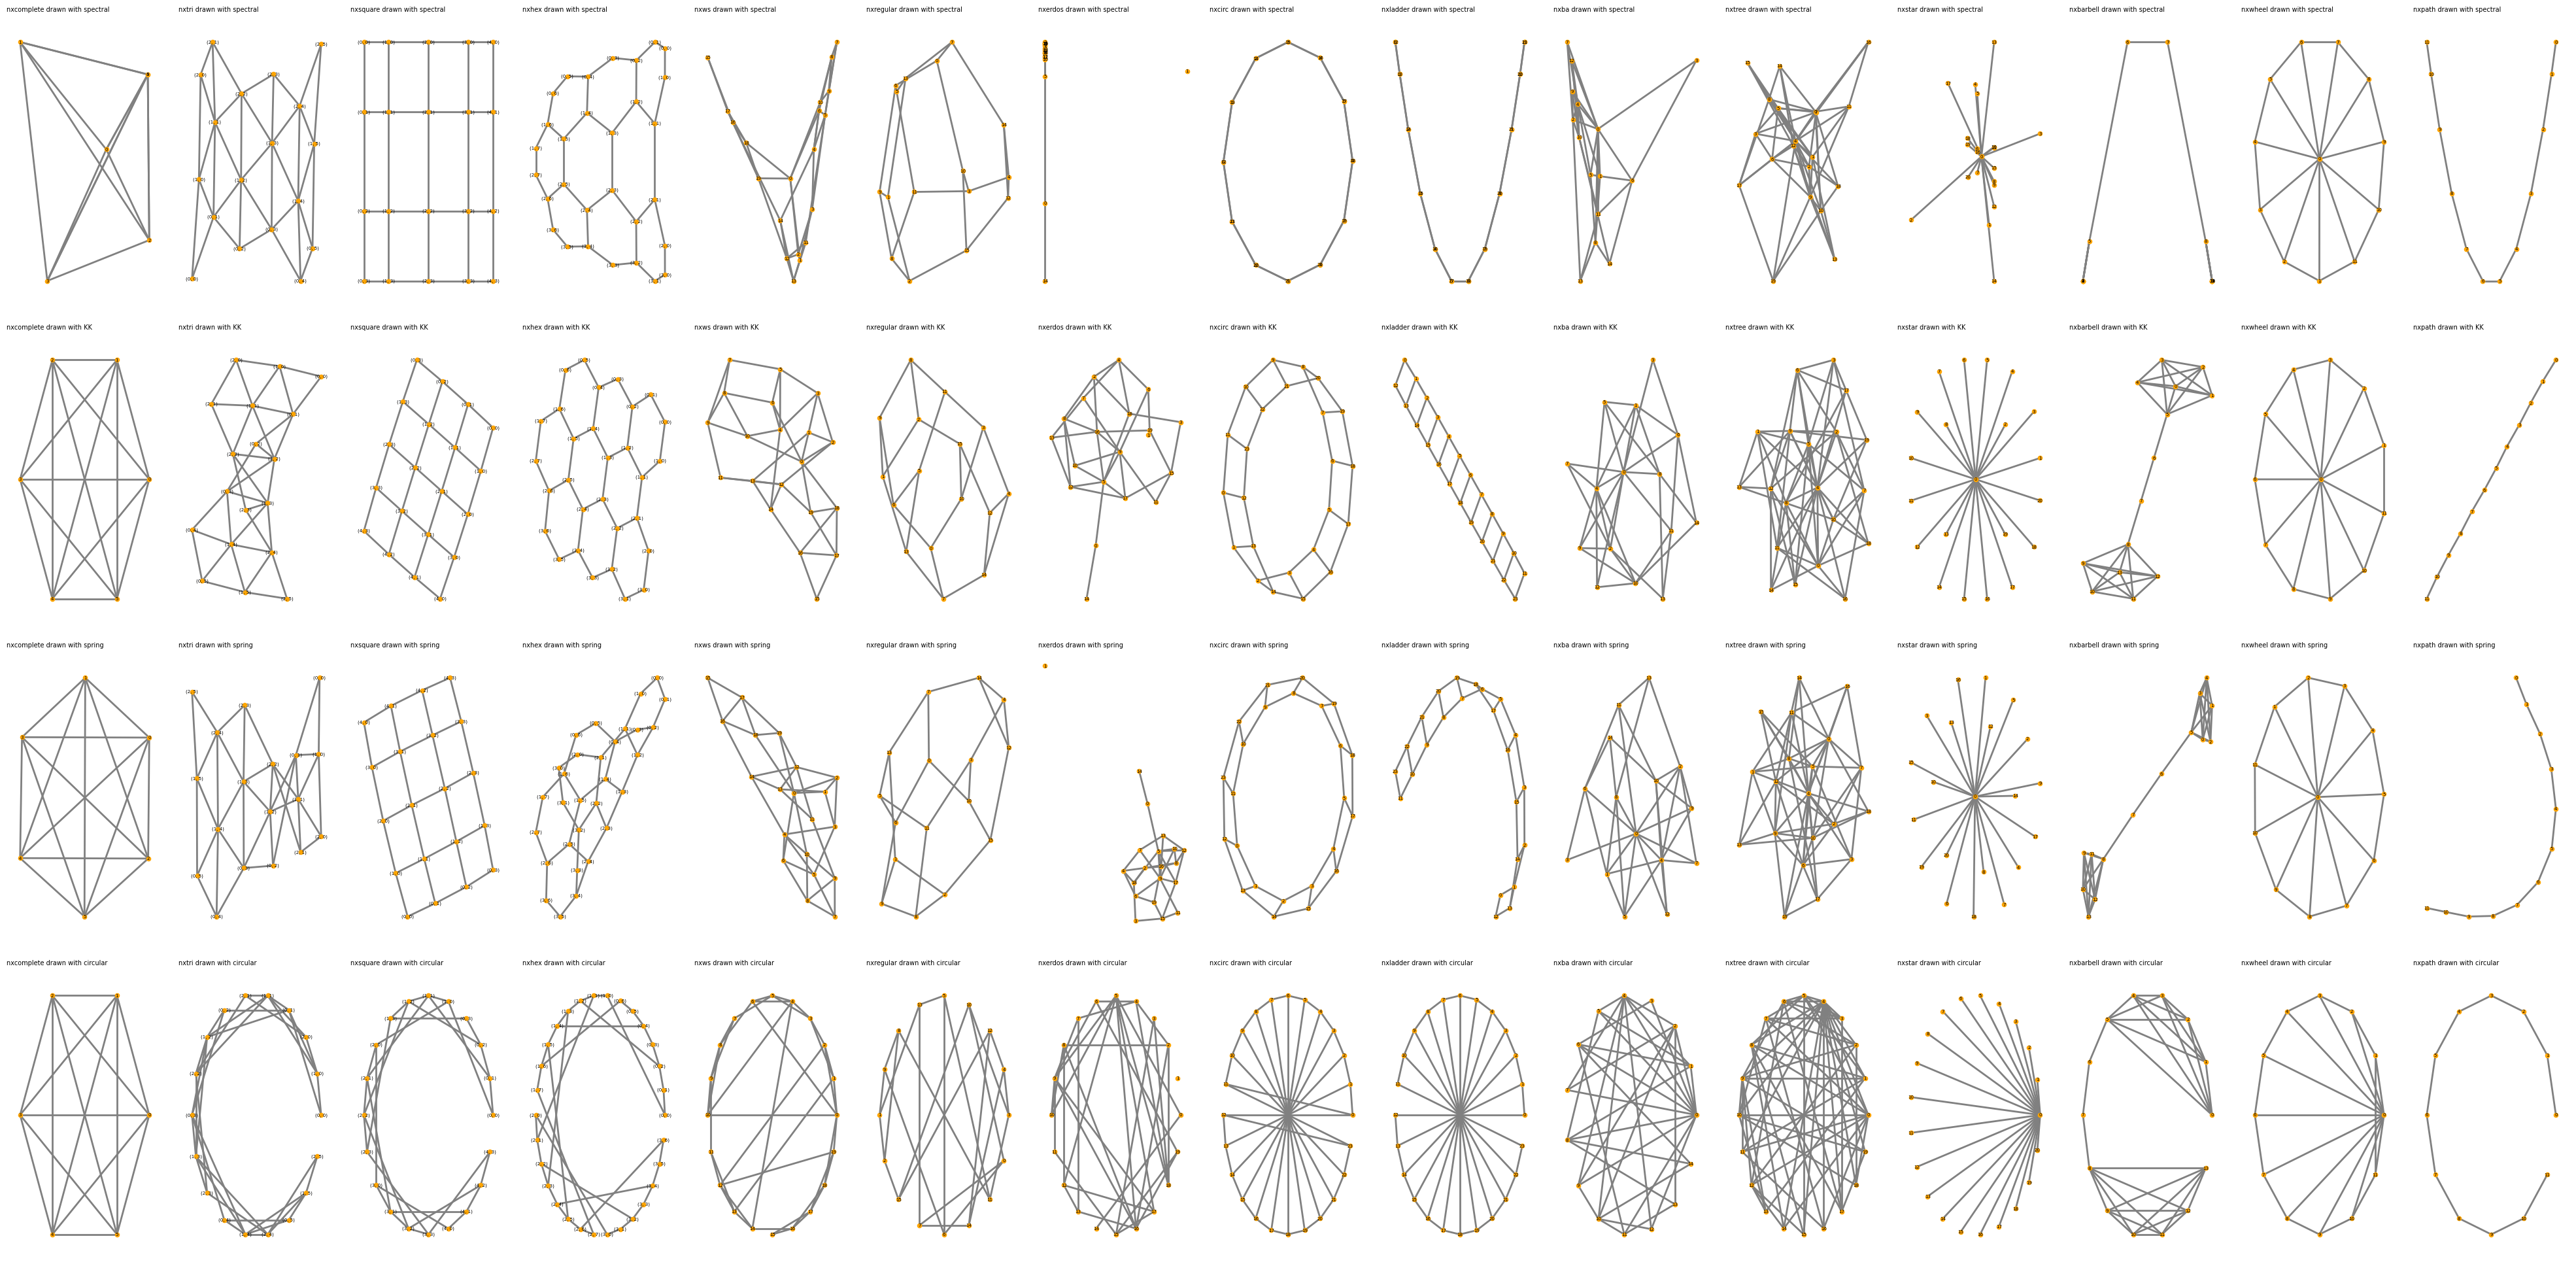

In [36]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout = False, figsize = (40, 20))

rows = len(layouts)
cols = len(examples)
gs = GridSpec(rows, cols, figure = fig, wspace = 0.1, hspace = 0.1)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 0.95, bottom = 0, right = 1, left = 0.02, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

row = 0
col = 0
for (l, ll) in layouts:
  for (G, gl) in examples:
    ax = fig.add_subplot(gs[row, col])
    col += 1
    if col == cols:
      row += 1
      col = 0
    nx.draw(G, pos = l(G), ax = ax, **opt)
    _ = ax.axis('off')
    plt.title(gl + ' drawn with ' + ll, loc = 'left', fontsize = 7)
fig.show()

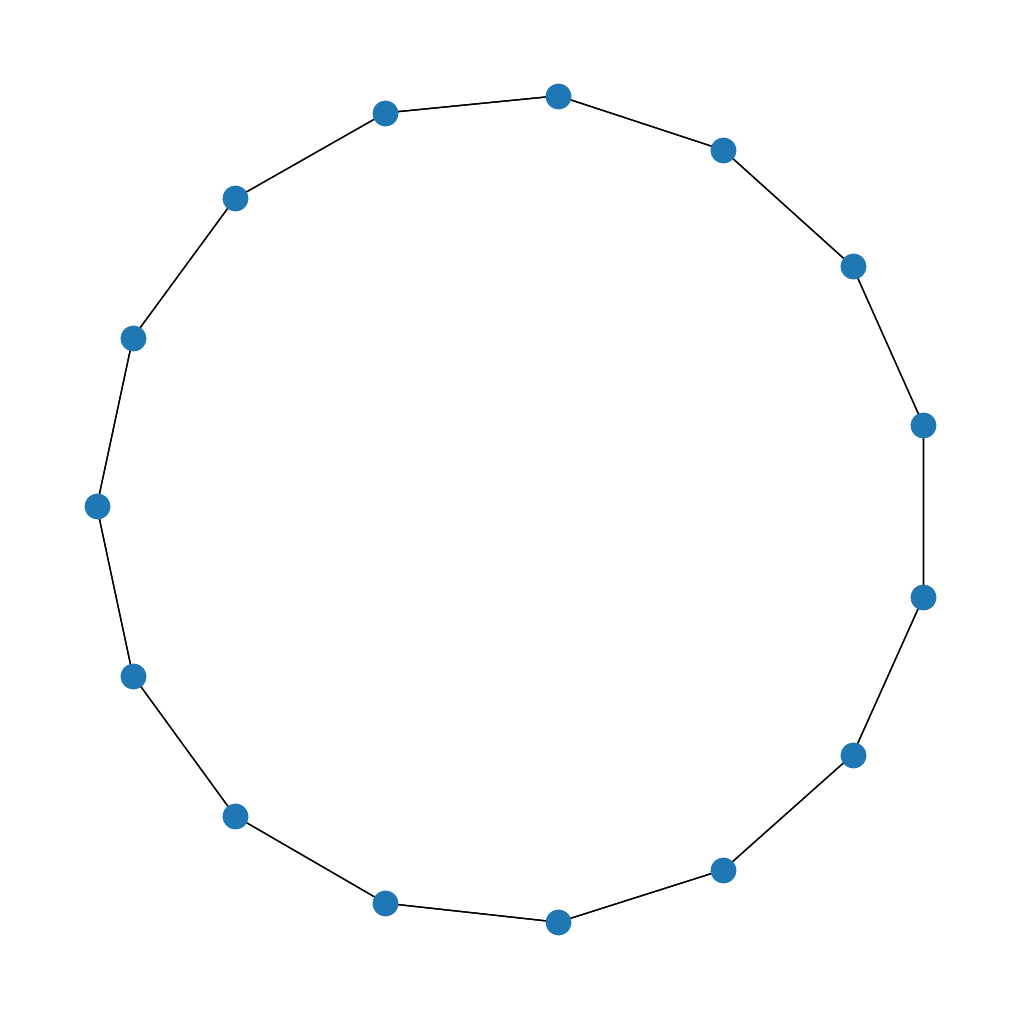

In [42]:
plt.rcParams["figure.figsize"] = (10, 10)
G = nx.generators.classic.circular_ladder_graph (15)
c3 = nx.spectral_layout(G)
nx.draw(G, pos = c3)

In [ ]:
from networkx.generators.random_graphs import powerlaw_cluster_graph
plt.rcParams["figure.figsize"] = (5, 5)
G = powerlaw_cluster_graph(10, 2, 0.05)
c1 = nx.spectral_layout(G)
nx.draw(G, pos = c1)

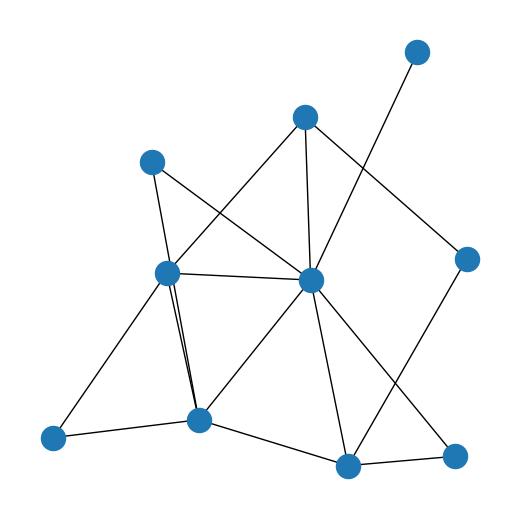

In [14]:
c2 = nx.kamada_kawai_layout(G, scale = 3) # another layout
nx.draw(G, pos = c2)

How to put these pictures in LaTeX?

In [15]:
!pip install network2tikz

In [16]:
from network2tikz import plot
import pydot
import networkx.drawing

In [17]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [43]:
!pip install pygraphviz

In [58]:
coords = networkx.drawing.nx_agraph.graphviz_layout(G, prog = "dot")

opt = {}
opt['node_label'] = [ f'N{v}' for v in G.nodes() ]
opt['node_color'] = 'pink'
opt['node_opacity'] = 0.95
opt['edge_curved'] = 0.8

plot( (G.nodes(), G.edges()), 'temp.tex', **opt, layout = c3)

What does this file contain?

In [59]:
with open('temp.tex') as source:
  for line in source:
    print(line.strip())

\documentclass{standalone}
\usepackage{tikz-network}
\begin{document}
\begin{tikzpicture}
\clip (0,0) rectangle (6,6);
\Vertex[x=0.350,y=3.567,color=pink,opacity=0.95,label=N0]{0}
\Vertex[x=0.582,y=2.476,color=pink,opacity=0.95,label=N1]{1}
\Vertex[x=1.236,y=1.571,color=pink,opacity=0.95,label=N2]{2}
\Vertex[x=2.201,y=1.008,color=pink,opacity=0.95,label=N3]{3}
\Vertex[x=3.309,y=0.886,color=pink,opacity=0.95,label=N4]{4}
\Vertex[x=4.369,y=1.224,color=pink,opacity=0.95,label=N5]{5}
\Vertex[x=5.197,y=1.965,color=pink,opacity=0.95,label=N6]{6}
\Vertex[x=5.650,y=2.980,color=pink,opacity=0.95,label=N7]{7}
\Vertex[x=5.650,y=4.094,color=pink,opacity=0.95,label=N8]{8}
\Vertex[x=5.197,y=5.114,color=pink,opacity=0.95,label=N9]{9}
\Edge[,bend=-50.194](0)(2)
\Edge[,bend=-50.194](0)(3)
\Edge[,bend=-50.194](0)(4)
\Edge[,bend=-50.194](0)(5)
\Edge[,bend=-50.194](0)(7)
\Edge[,bend=-50.194](0)(8)
\Edge[,bend=-50.194](1)(2)
\Edge[,bend=-50.194](1)(3)
\Edge[,bend=-50.194](1)(6)
\Edge[,bend=-50.194](2)(4)
\

[My Pic](https://ko.overleaf.com/read/rbwqyfhsgjwj#09ec2f)